In [334]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcdefaults
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
rcdefaults()

# Functions

In [280]:
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Milk Production per Cow 1962 - 75


In [281]:
df_milk = pd.read_csv('milk_production.csv')

In [282]:
df_milk

,Month,MilkProduction
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697
6,1962-07,640
7,1962-08,599
8,1962-09,568
9,1962-10,577


In [283]:
rng = pd.date_range(df_milk.Month[0], periods=len(df_milk), freq='M')

In [284]:
rng

DatetimeIndex(['1962-01-31', '1962-02-28', '1962-03-31', '1962-04-30',
               '1962-05-31', '1962-06-30', '1962-07-31', '1962-08-31',
               '1962-09-30', '1962-10-31',
               ...
               '1975-03-31', '1975-04-30', '1975-05-31', '1975-06-30',
               '1975-07-31', '1975-08-31', '1975-09-30', '1975-10-31',
               '1975-11-30', '1975-12-31'],
              dtype='datetime64[ns]', length=168, freq='M')

In [285]:
ts_milk = pd.Series(df_milk.MilkProduction.values, index=rng)

In [286]:
ts_milk

1962-01-31    589
1962-02-28    561
1962-03-31    640
1962-04-30    656
1962-05-31    727
1962-06-30    697
1962-07-31    640
1962-08-31    599
1962-09-30    568
1962-10-31    577
1962-11-30    553
1962-12-31    582
1963-01-31    600
1963-02-28    566
1963-03-31    653
1963-04-30    673
1963-05-31    742
1963-06-30    716
1963-07-31    660
1963-08-31    617
1963-09-30    583
1963-10-31    587
1963-11-30    565
1963-12-31    598
1964-01-31    628
1964-02-29    618
1964-03-31    688
1964-04-30    705
1964-05-31    770
1964-06-30    736
             ... 
1973-07-31    881
1973-08-31    837
1973-09-30    784
1973-10-31    791
1973-11-30    760
1973-12-31    802
1974-01-31    828
1974-02-28    778
1974-03-31    889
1974-04-30    902
1974-05-31    969
1974-06-30    947
1974-07-31    908
1974-08-31    867
1974-09-30    815
1974-10-31    812
1974-11-30    773
1974-12-31    813
1975-01-31    834
1975-02-28    782
1975-03-31    892
1975-04-30    903
1975-05-31    966
1975-06-30    937
1975-07-31

# Plot the Data

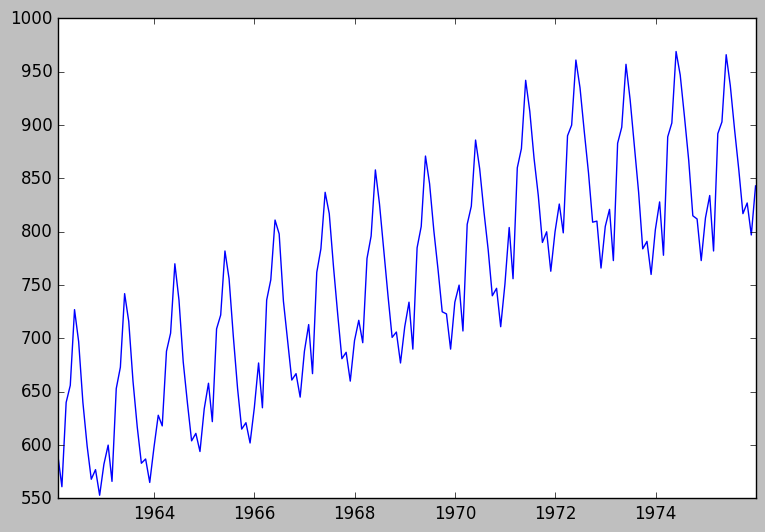

In [287]:
plt.figure(figsize=(9,6))
plt.plot(ts_milk, color = 'blue')
plt.show()

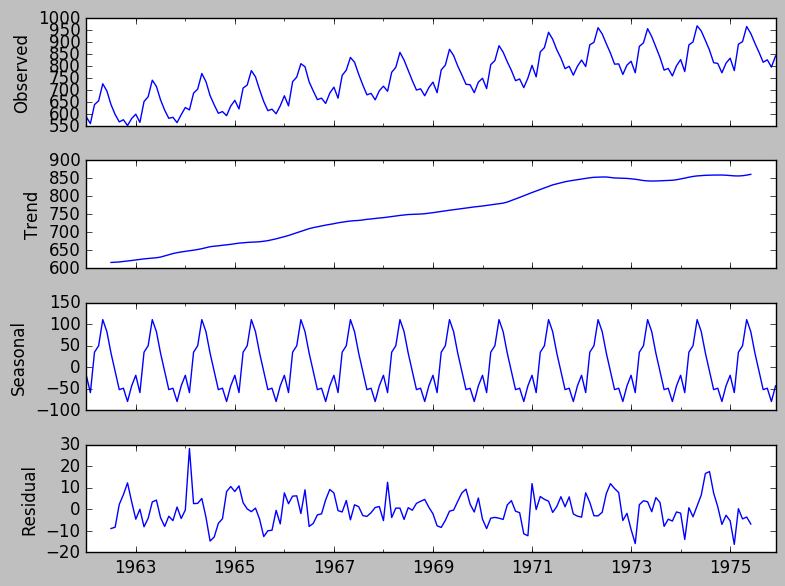

In [288]:
res = sm.tsa.seasonal_decompose(ts_milk)
resplot = res.plot()
plt.show()

In [289]:
test_stationarity(ts_milk)

Results of Dickey-Fuller Test:
Test Statistic                  -1.303812
p-value                          0.627427
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (5%)             -2.880498
Critical Value (1%)             -3.473543
Critical Value (10%)            -2.576878
dtype: float64


# Let's Try and Make it Stationary

In [290]:
ts_milk_fd = ts_milk - ts_milk.shift() 
ts_milk_fd = ts_milk_fd[np.isnan(ts_milk_fd) == False]
test_stationarity(ts_milk_fd)

Results of Dickey-Fuller Test:
Test Statistic                  -3.054996
p-value                          0.030068
#Lags Used                      14.000000
Number of Observations Used    152.000000
Critical Value (5%)             -2.880750
Critical Value (1%)             -3.474121
Critical Value (10%)            -2.577013
dtype: float64


In [291]:
ts_milk_log = np.log(ts_milk)
test_stationarity(ts_milk_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.754797
p-value                          0.403123
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (5%)             -2.880498
Critical Value (1%)             -3.473543
Critical Value (10%)            -2.576878
dtype: float64


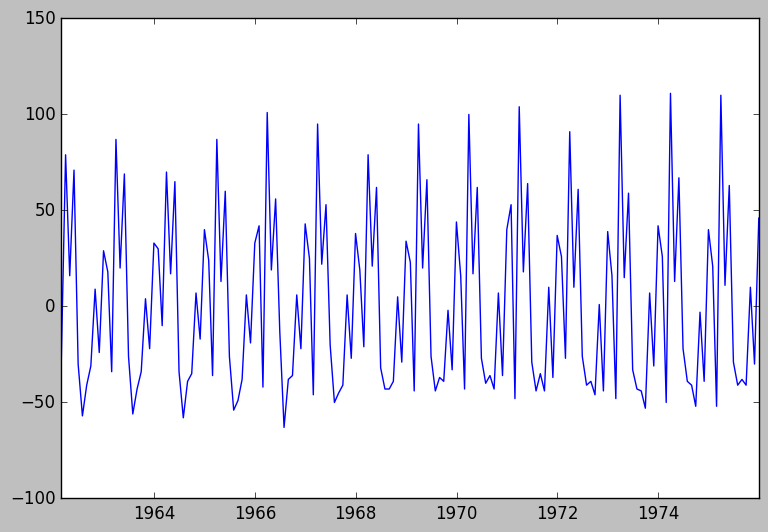

In [292]:
plt.figure(figsize=(9,6))
plt.plot(ts_milk_fd, color = 'blue')
plt.show()

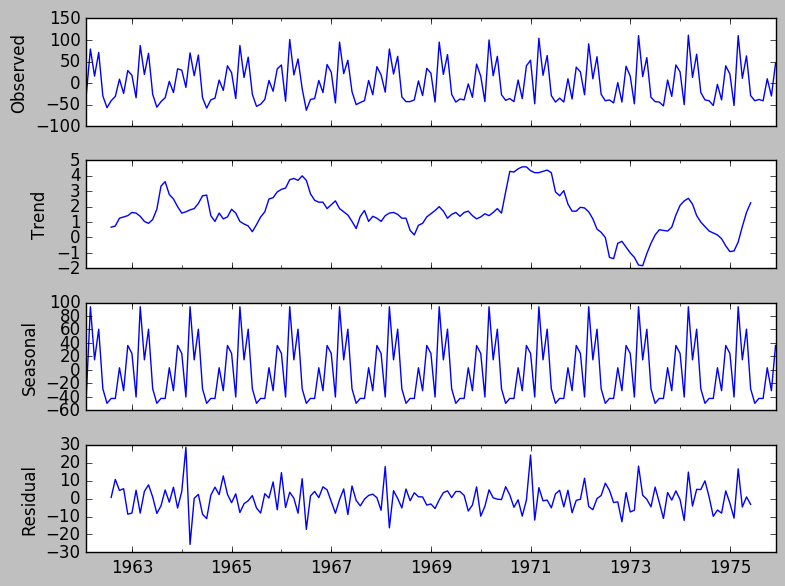

In [293]:
res = sm.tsa.seasonal_decompose(ts_milk_fd)
resplot = res.plot()
plt.show()

# Plot ACF / PACF

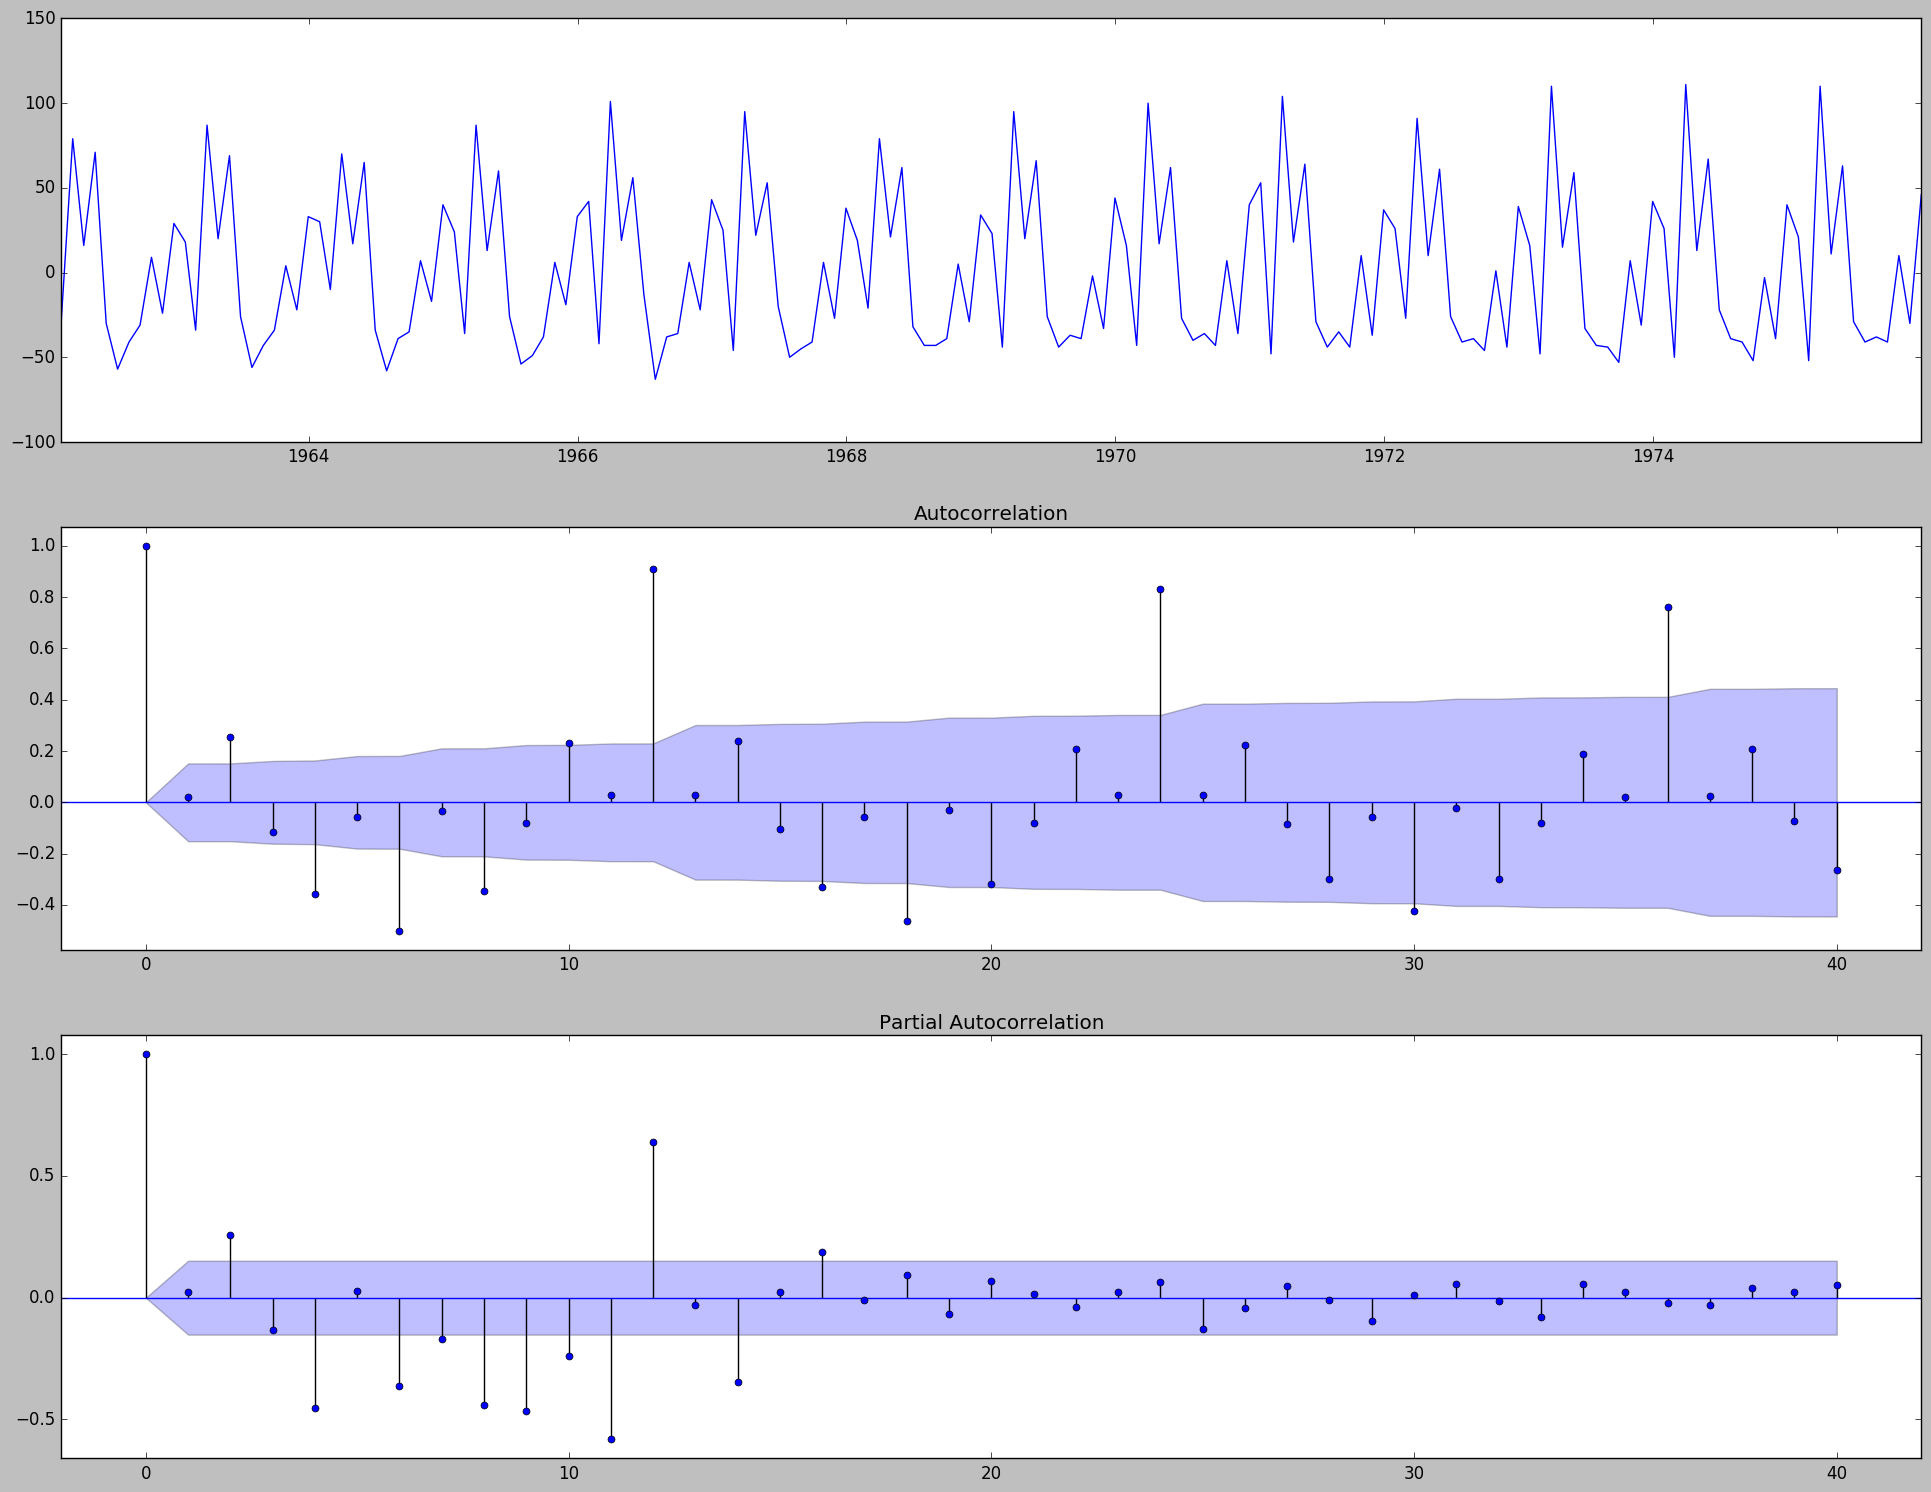

In [294]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(24,18)) 
ax1.plot(ts_milk_fd)
sm.graphics.tsa.plot_acf(ts_milk_fd.values.squeeze(), lags=40, ax = ax2)
sm.graphics.tsa.plot_pacf(ts_milk_fd.values.squeeze(), lags=40, ax = ax3)

# Split to Train and Test

In [295]:
ts_milk_fd_train = ts_milk_fd[:datetime.datetime(1975, 9, 30)]

In [296]:
ts_milk_fd_test = ts_milk_fd[datetime.datetime(1975, 10, 31):]

# Let's Try AR(2)

In [297]:
model = ARMA(ts_milk_fd_train, order=(2,0))  
results_AR = model.fit() 
forecast = pd.Series(results_AR.forecast(3)[0], index = ts_milk_fd_test.index)

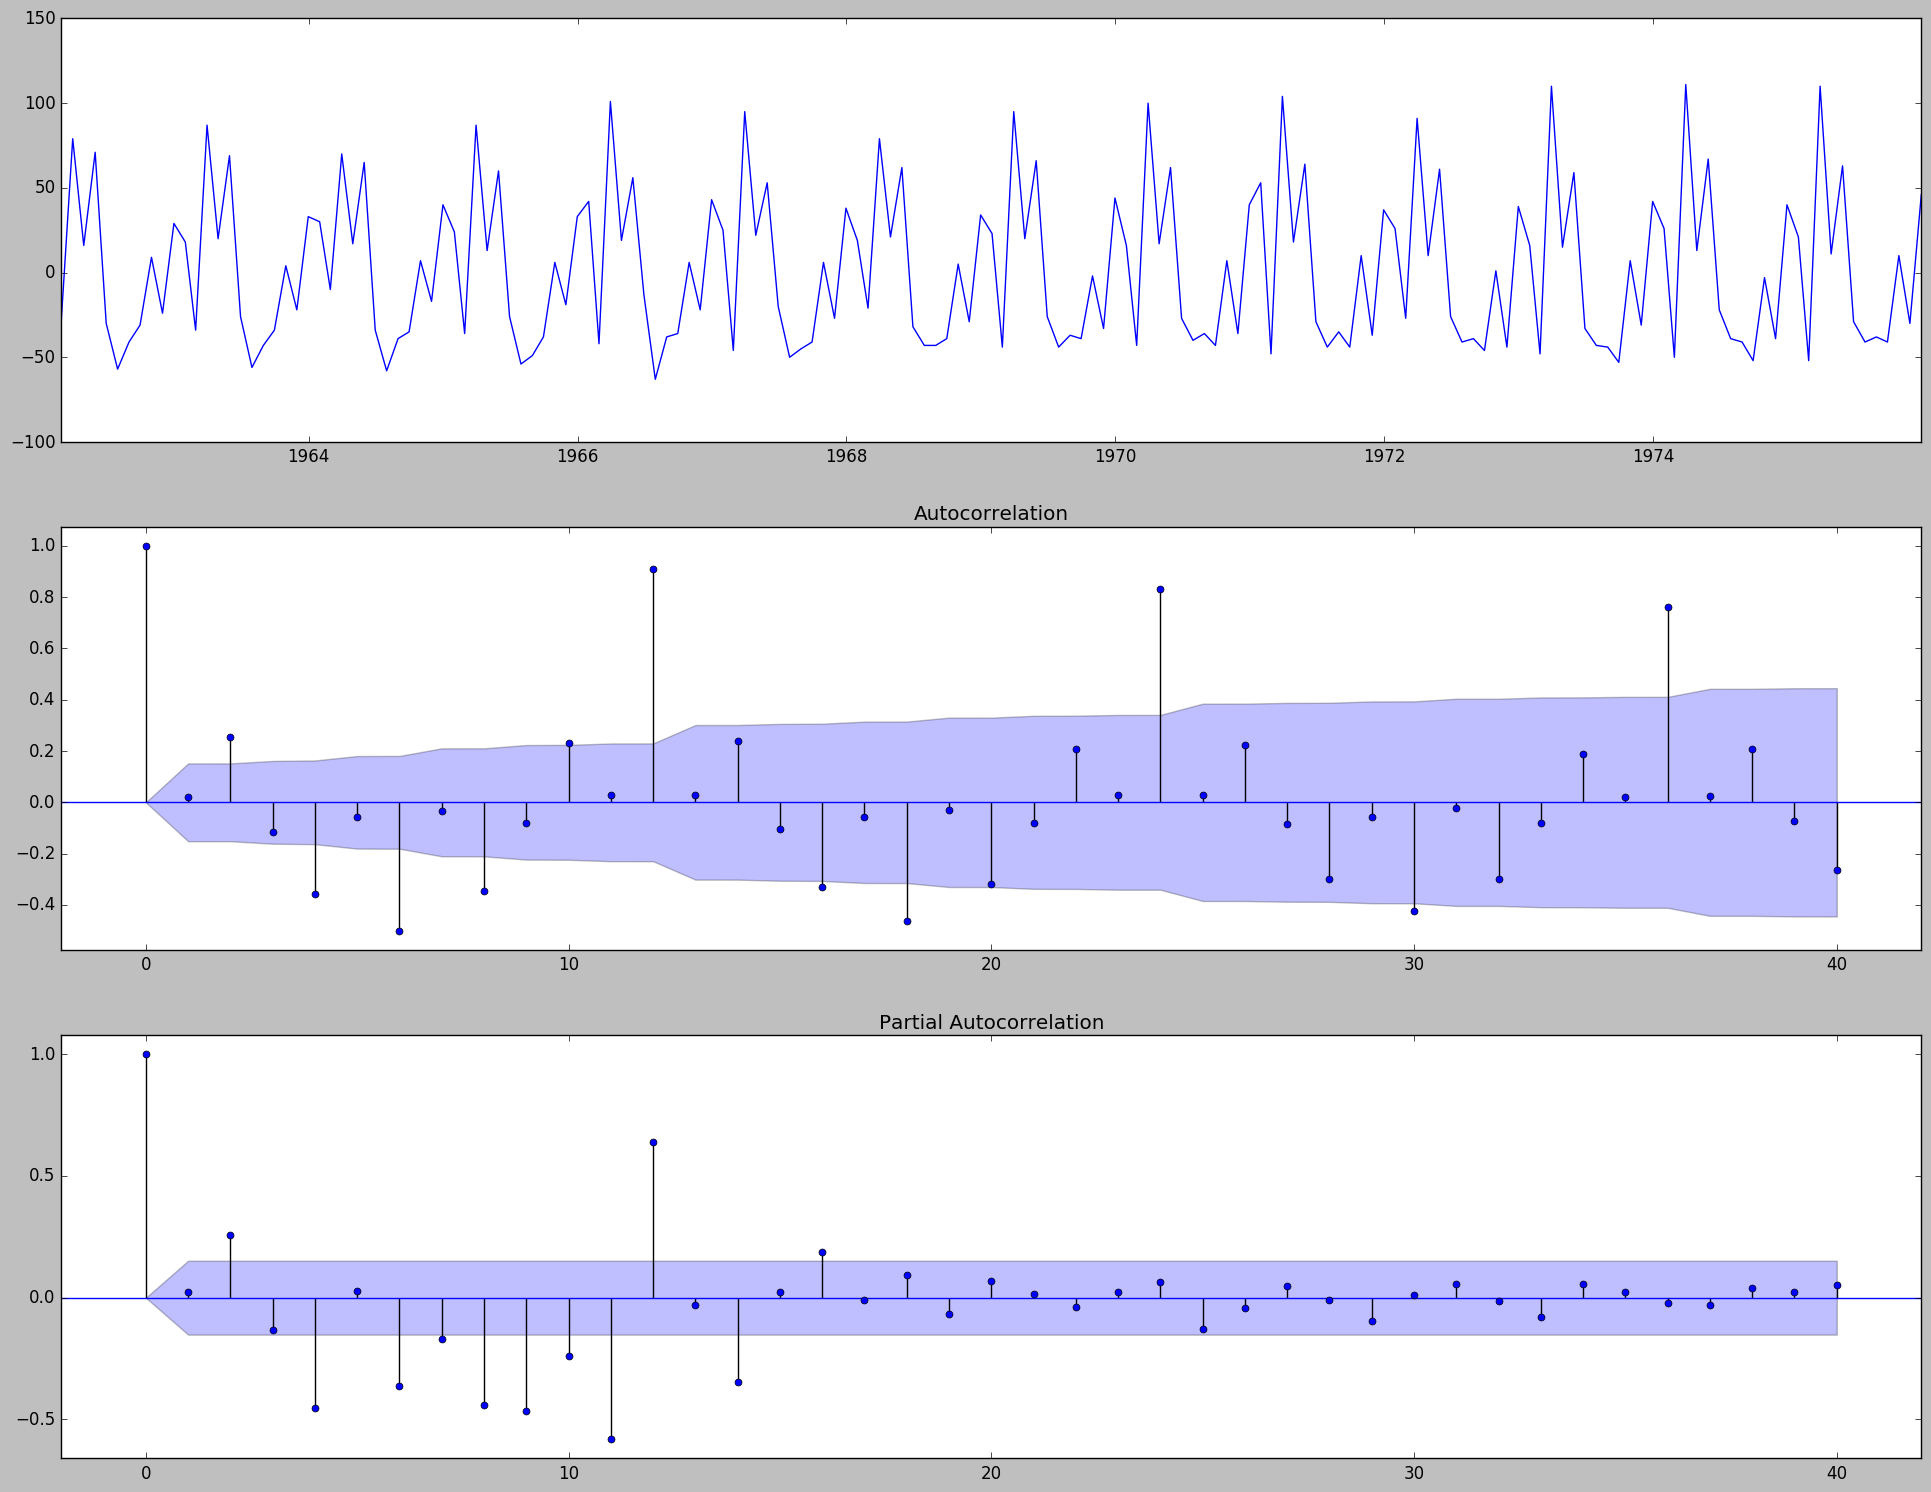

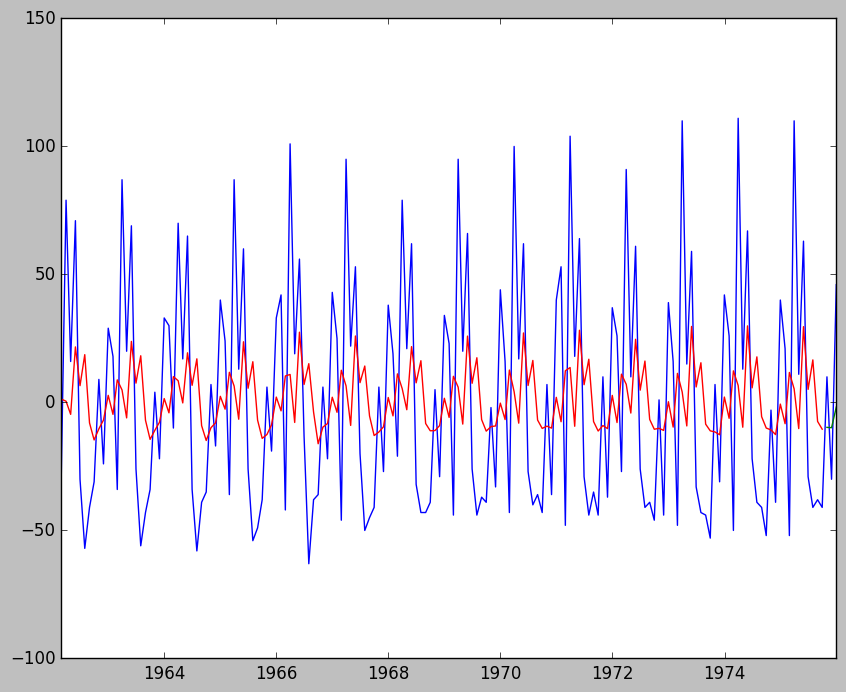

In [298]:
plt.figure(figsize=(10,8))
plt.plot(ts_milk_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.show()

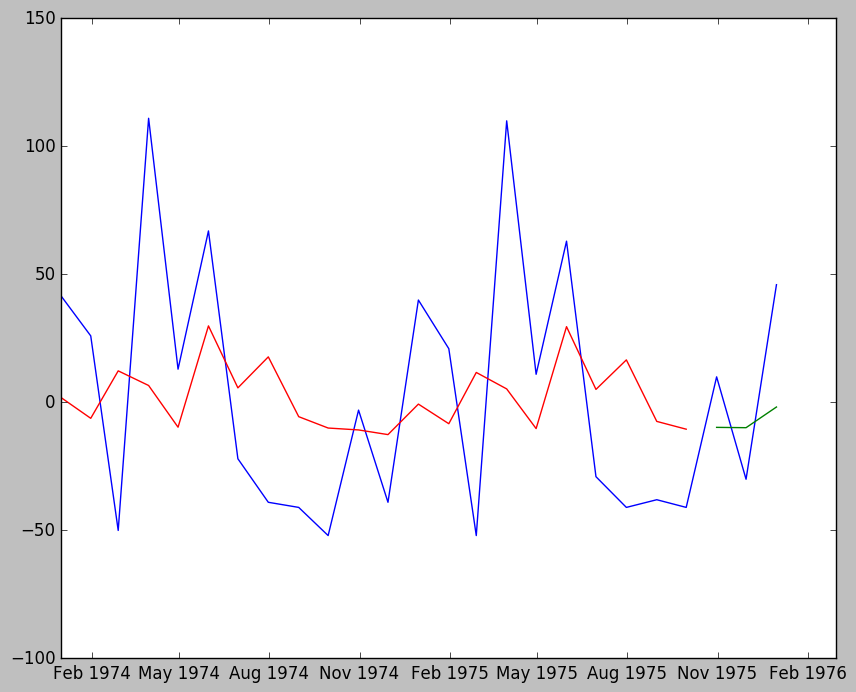

In [299]:
plt.figure(figsize=(10,8))
plt.plot(ts_milk_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.xlim(datetime.datetime(1974,1,1), datetime.datetime(1976,3,1))
plt.show()

# What if we try MA(2)

In [337]:
model = ARMA(ts_milk_fd_train, order=(0,2))  
results_AR = model.fit() 
forecast = pd.Series(results_AR.forecast(3)[0], index = ts_milk_fd_test.index)

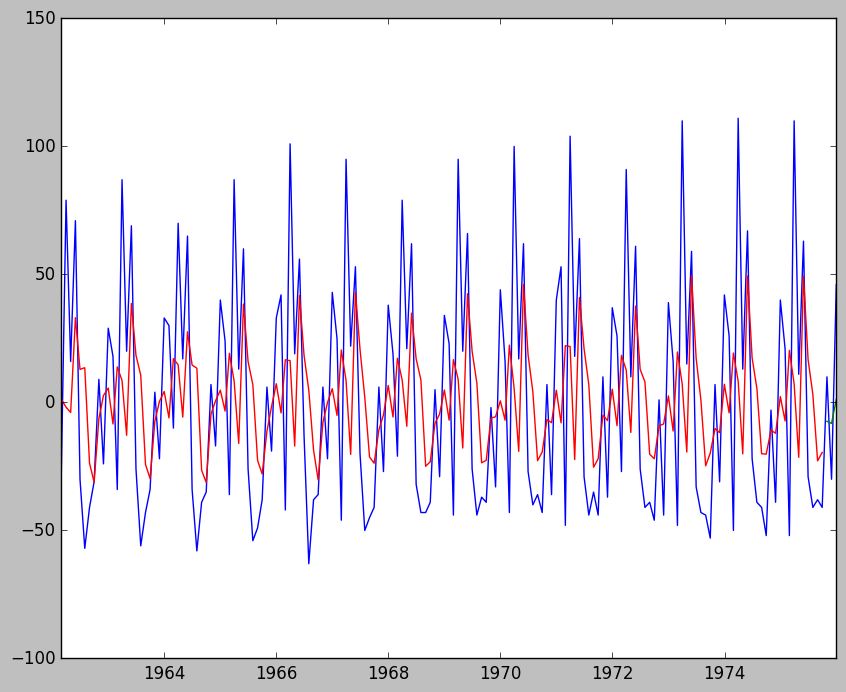

In [338]:
plt.figure(figsize=(10,8))
plt.plot(ts_milk_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.show()

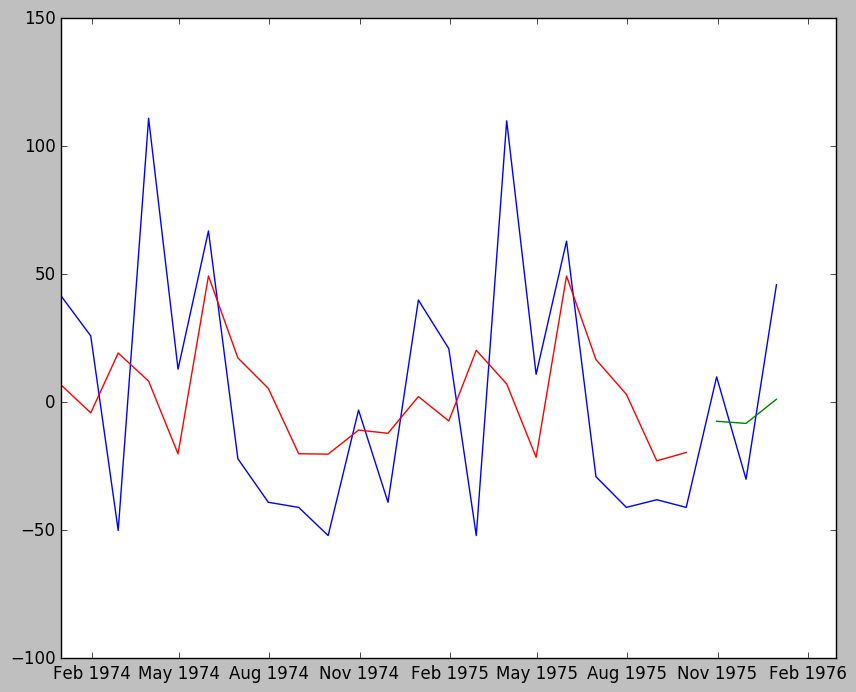

In [339]:
plt.figure(figsize=(10,8))
plt.plot(ts_milk_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.xlim(datetime.datetime(1974,1,1), datetime.datetime(1976,3,1))
plt.show()

# ARMA Time

In [340]:
model = ARMA(ts_milk_fd_train, order=(4,4))  
results_AR = model.fit() 
forecast = pd.Series(results_AR.forecast(3)[0], index = ts_milk_fd_test.index)

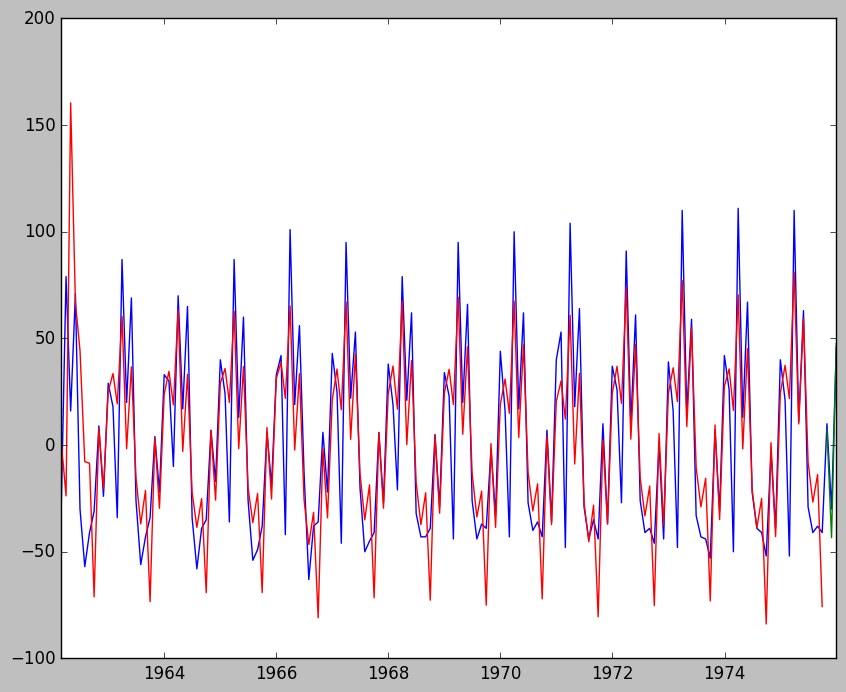

In [341]:
plt.figure(figsize=(10,8))
plt.plot(ts_milk_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.show()

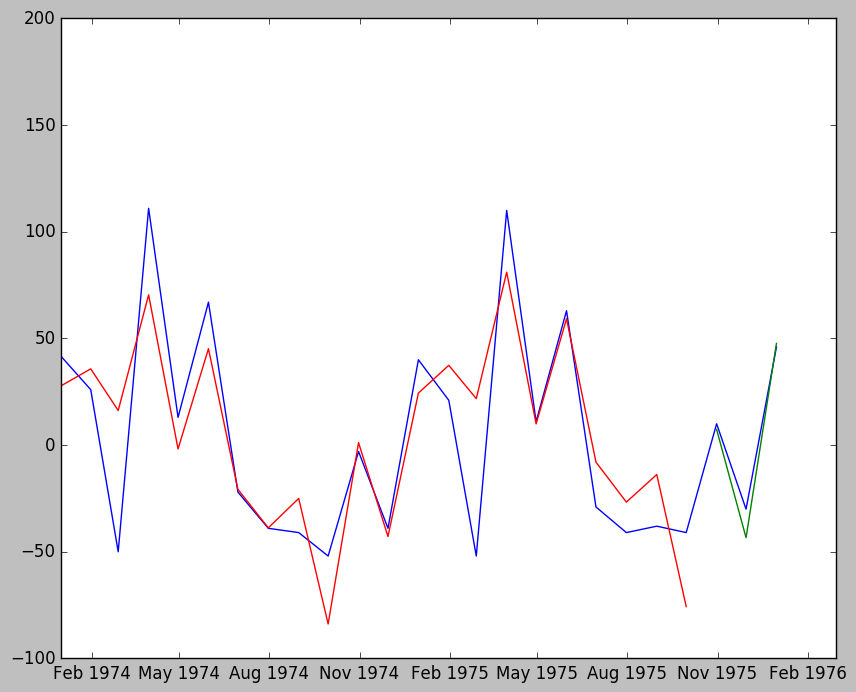

In [342]:
plt.figure(figsize=(10,8))
plt.plot(ts_milk_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.xlim(datetime.datetime(1974,1,1), datetime.datetime(1976,3,1))
plt.show()

# Is there Structure in our Residuals?

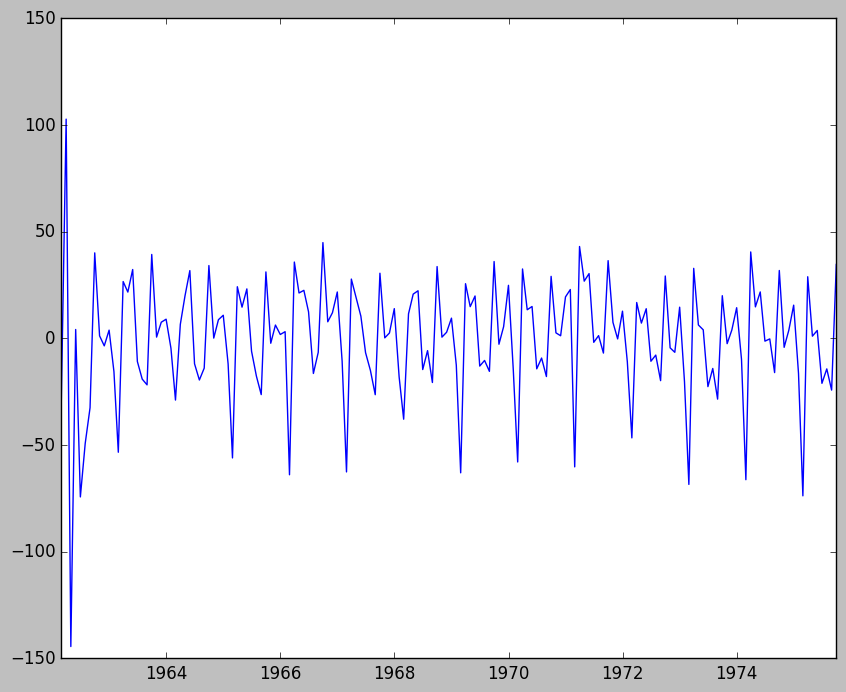

In [306]:
plt.figure(figsize=(10,8))
resid = ts_milk_fd_train - results_AR.fittedvalues
plt.plot(resid)
plt.show()

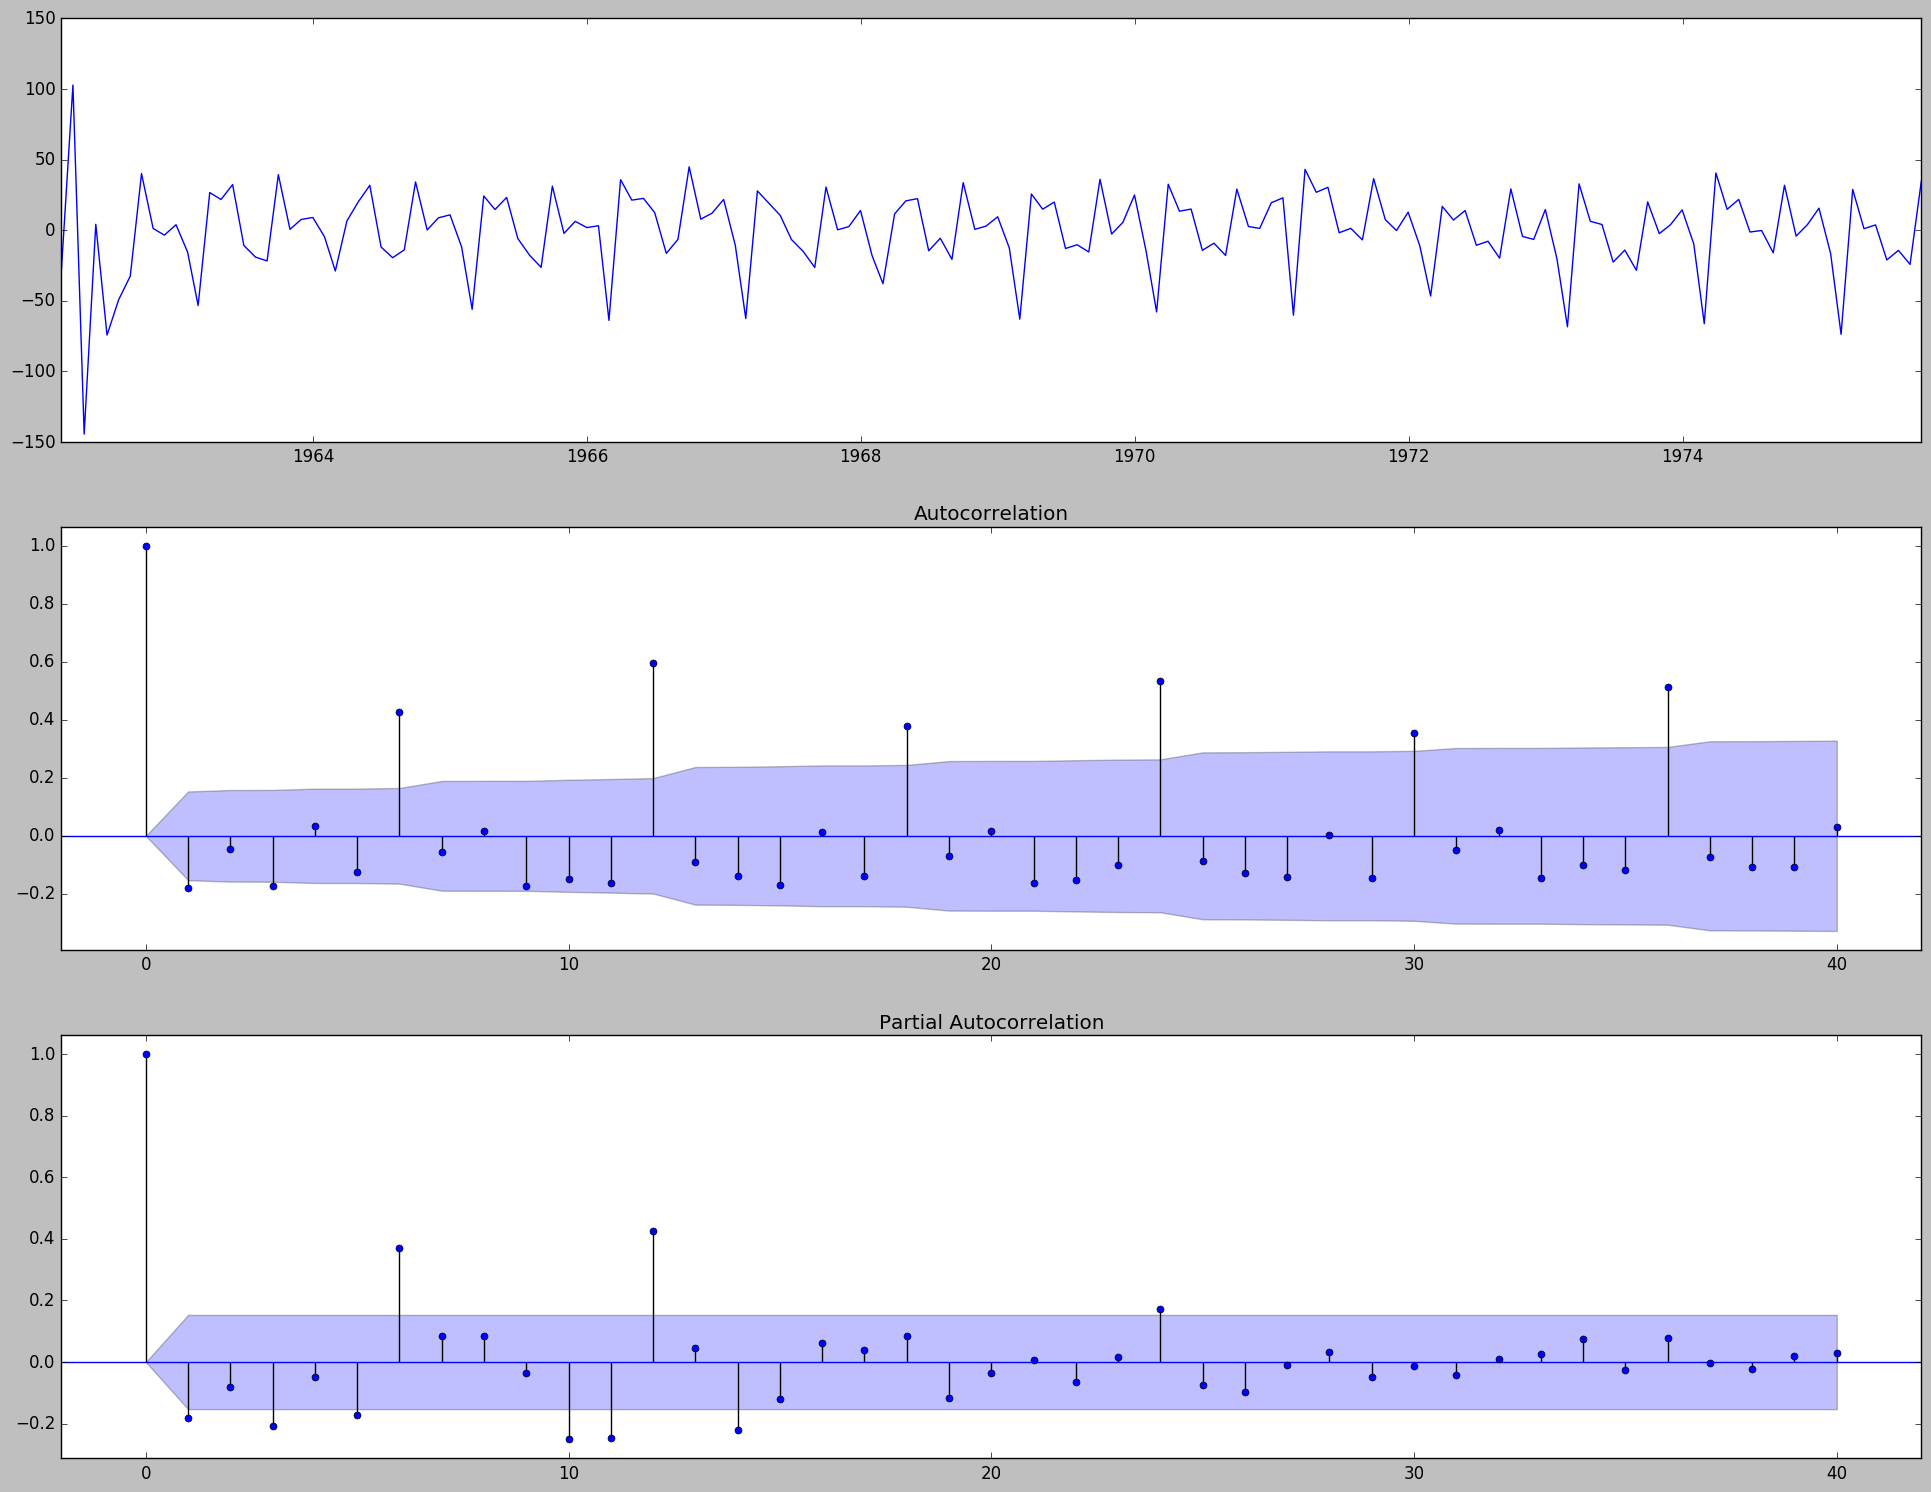

In [307]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(24,18)) 
ax1.plot(resid)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax = ax2)
sm.graphics.tsa.plot_pacf(resid.values.squeeze(), lags=40, ax = ax3)

# Car Sales in Quebec 1960 - 68

In [308]:
df_car = pd.read_csv('carsales.csv')

In [309]:
df_car

,Month,CarSales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


In [310]:
rng = pd.date_range(df_car.Month[0], periods=len(df_car), freq='M')

In [311]:
rng

DatetimeIndex(['1960-01-31', '1960-02-29', '1960-03-31', '1960-04-30',
               '1960-05-31', '1960-06-30', '1960-07-31', '1960-08-31',
               '1960-09-30', '1960-10-31',
               ...
               '1968-03-31', '1968-04-30', '1968-05-31', '1968-06-30',
               '1968-07-31', '1968-08-31', '1968-09-30', '1968-10-31',
               '1968-11-30', '1968-12-31'],
              dtype='datetime64[ns]', length=108, freq='M')

In [312]:
ts_car = pd.Series(df_car.CarSales.values, index=rng)

In [313]:
ts_car

1960-01-31     6550
1960-02-29     8728
1960-03-31    12026
1960-04-30    14395
1960-05-31    14587
1960-06-30    13791
1960-07-31     9498
1960-08-31     8251
1960-09-30     7049
1960-10-31     9545
1960-11-30     9364
1960-12-31     8456
1961-01-31     7237
1961-02-28     9374
1961-03-31    11837
1961-04-30    13784
1961-05-31    15926
1961-06-30    13821
1961-07-31    11143
1961-08-31     7975
1961-09-30     7610
1961-10-31    10015
1961-11-30    12759
1961-12-31     8816
1962-01-31    10677
1962-02-28    10947
1962-03-31    15200
1962-04-30    17010
1962-05-31    20900
1962-06-30    16205
              ...  
1966-07-31    15388
1966-08-31    15113
1966-09-30    13401
1966-10-31    16135
1966-11-30    17562
1966-12-31    14720
1967-01-31    12225
1967-02-28    11608
1967-03-31    20985
1967-04-30    19692
1967-05-31    24081
1967-06-30    22114
1967-07-31    14220
1967-08-31    13434
1967-09-30    13598
1967-10-31    17187
1967-11-30    16119
1967-12-31    13713
1968-01-31    13210


# Plot the Data

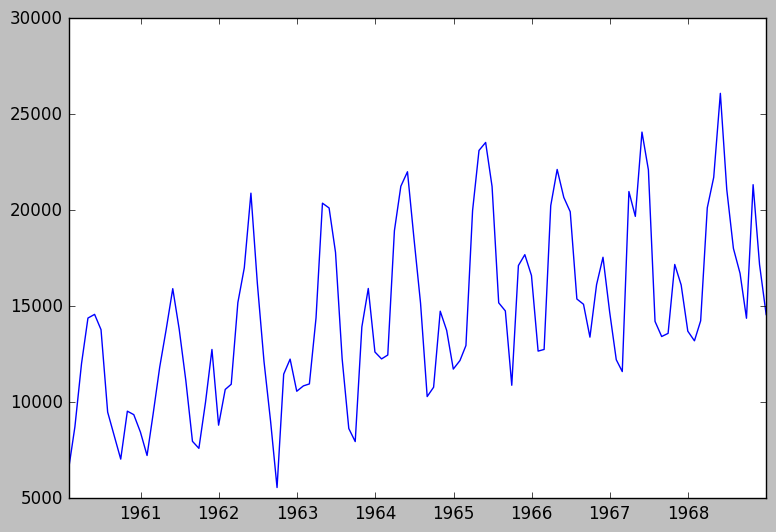

In [343]:
plt.figure(figsize=(9,6))
plt.plot(ts_car, color = 'blue')
plt.show()

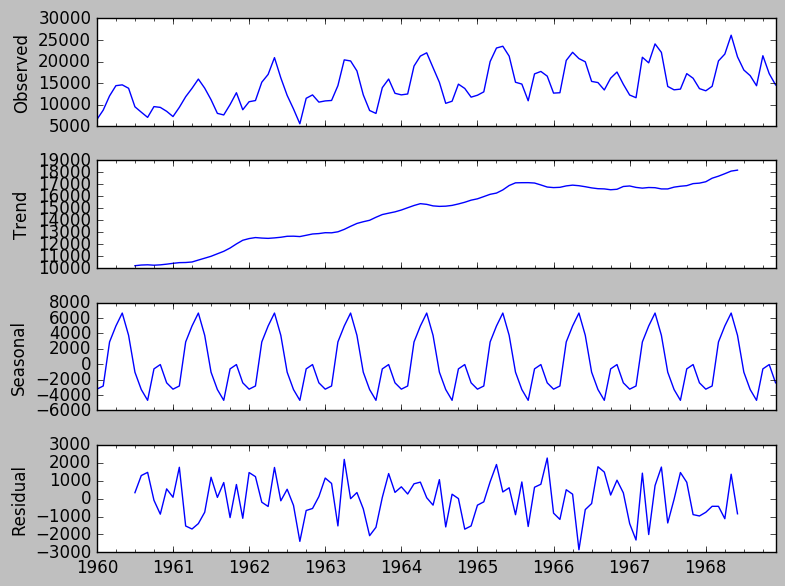

In [315]:
res = sm.tsa.seasonal_decompose(ts_car)
resplot = res.plot()
plt.show()

In [316]:
test_stationarity(ts_car)

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (5%)            -2.892480
Critical Value (1%)            -3.501137
Critical Value (10%)           -2.583275
dtype: float64


# Let's Try and Make it Stationary

In [317]:
ts_car_fd = ts_car - ts_car.shift() 
ts_car_fd = ts_car_fd[np.isnan(ts_car_fd) == False]
test_stationarity(ts_car_fd)

Results of Dickey-Fuller Test:
Test Statistic                -6.199799e+00
p-value                        5.844753e-08
#Lags Used                     1.100000e+01
Number of Observations Used    9.500000e+01
Critical Value (5%)           -2.892480e+00
Critical Value (1%)           -3.501137e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


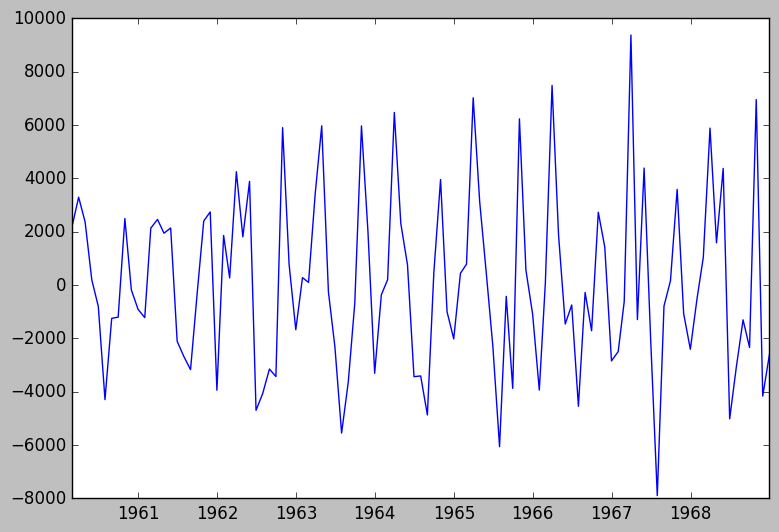

In [318]:
plt.figure(figsize=(9,6))
plt.plot(ts_car_fd, color = 'blue')
plt.show()

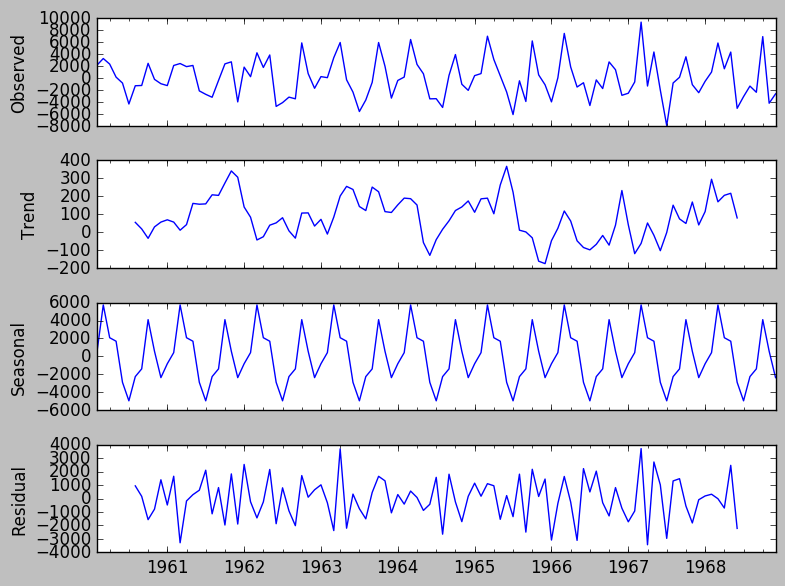

In [319]:
res = sm.tsa.seasonal_decompose(ts_car_fd)
resplot = res.plot()
plt.show()

# Plot ACF / PACF

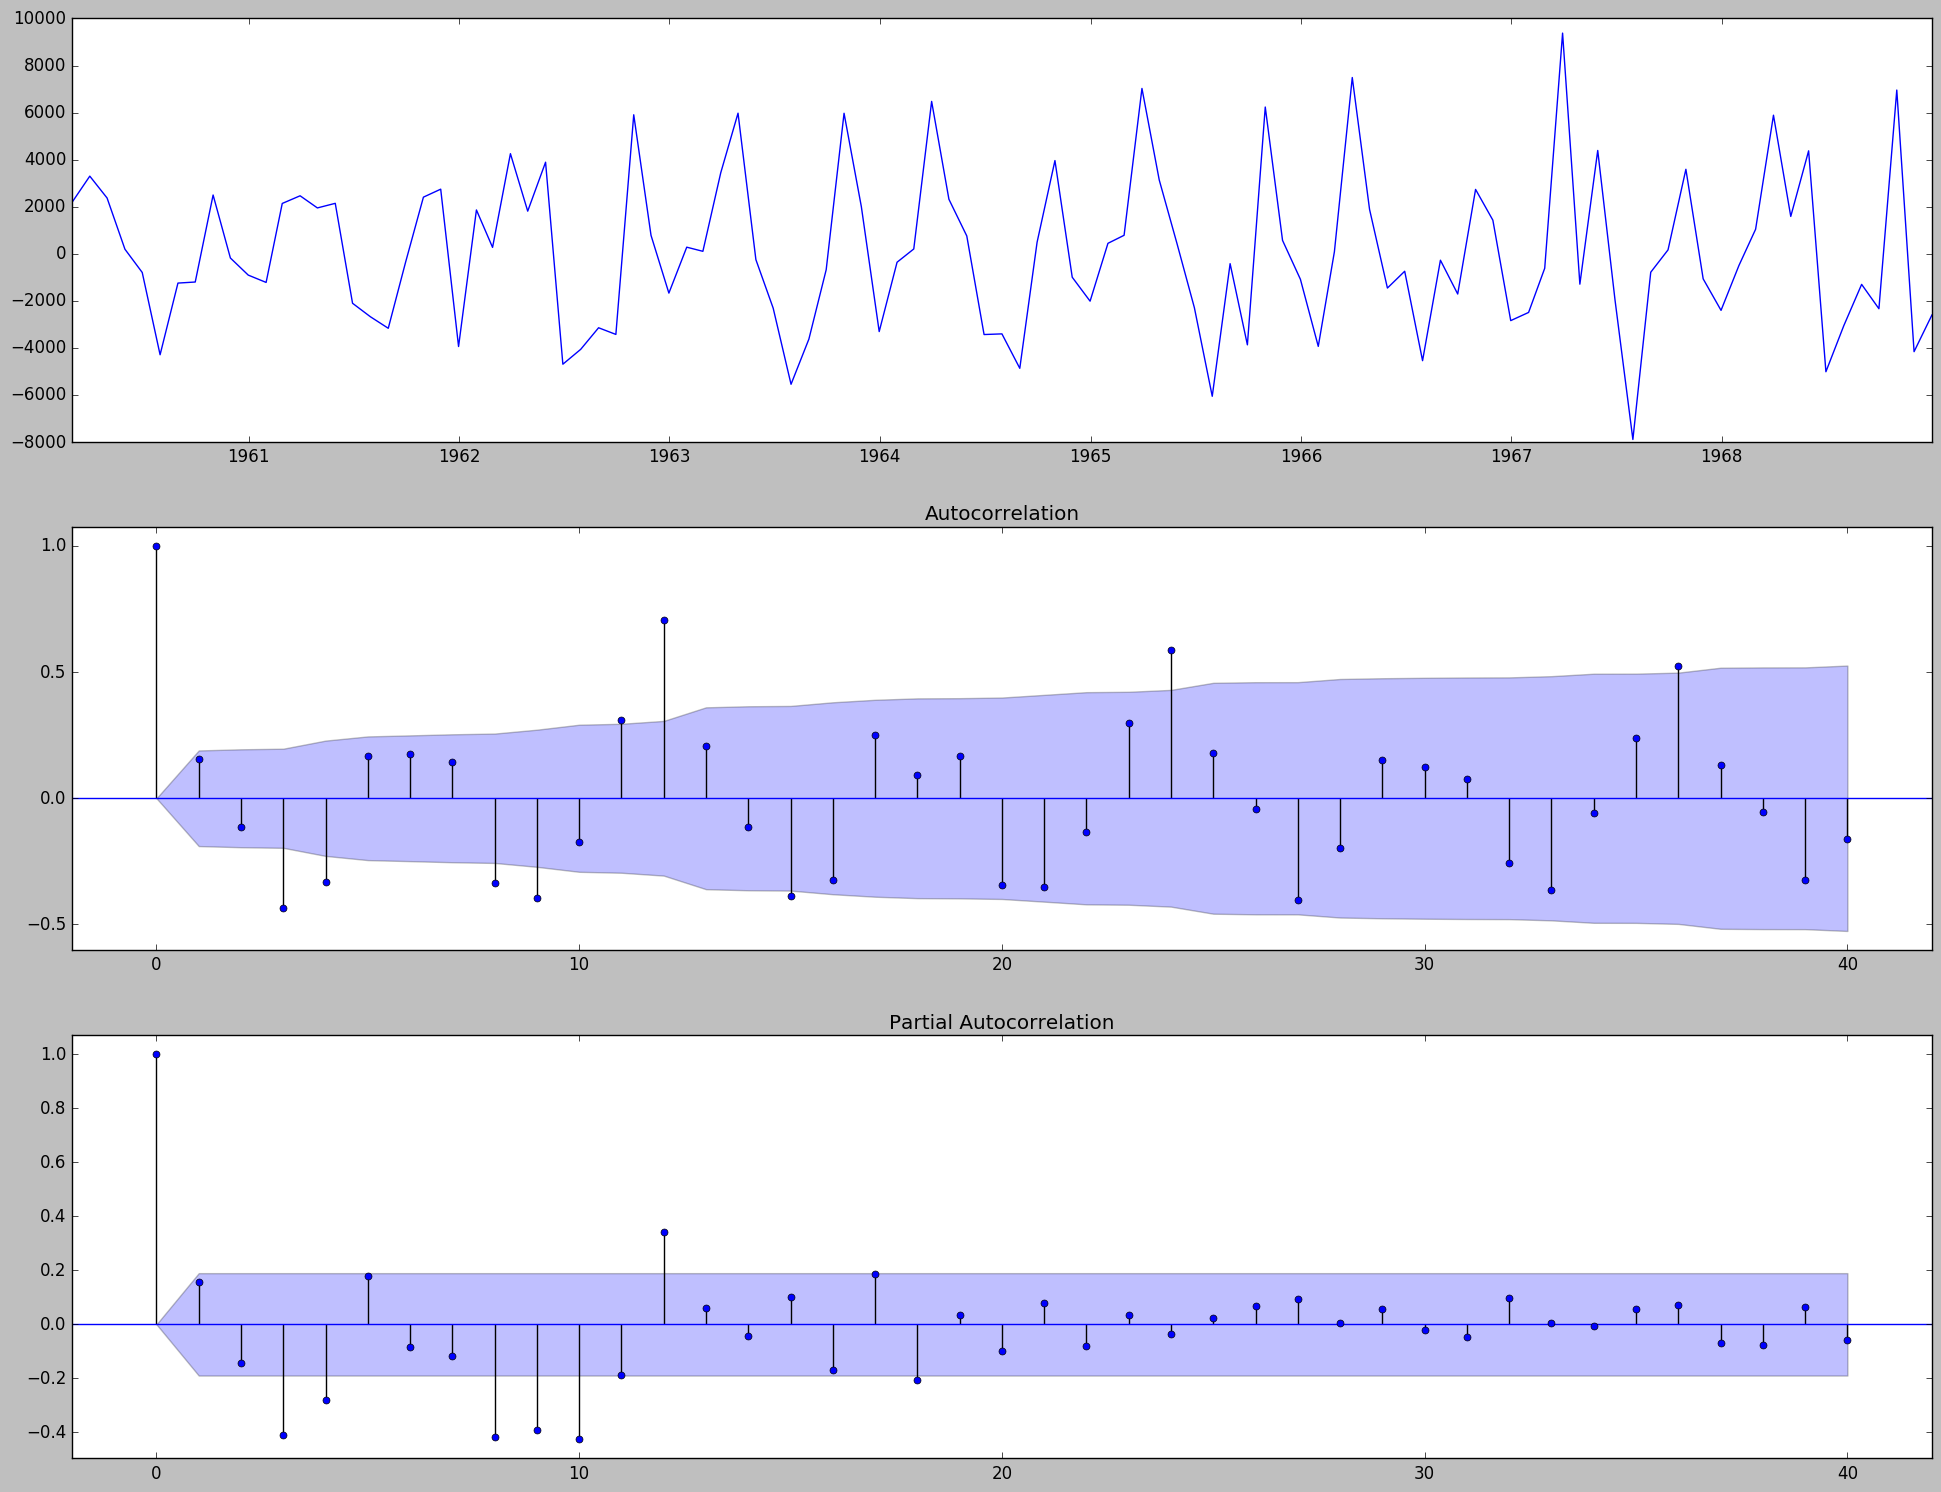

In [320]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(24,18)) 
ax1.plot(ts_car_fd)
sm.graphics.tsa.plot_acf(ts_car_fd.values.squeeze(), lags=40, ax = ax2)
sm.graphics.tsa.plot_pacf(ts_car_fd.values.squeeze(), lags=40, ax = ax3)

# Split to Train and Test

In [321]:
ts_car_fd_train = ts_car_fd[:datetime.datetime(1968, 9, 30)]

In [322]:
ts_car_fd_test = ts_car_fd[datetime.datetime(1968, 10, 31):]

# Let's Try AR(4)

In [323]:
model = ARMA(ts_car_fd_train, order=(4,0))  
results_AR = model.fit() 
forecast = pd.Series(results_AR.forecast(3)[0], index = ts_car_fd_test.index)

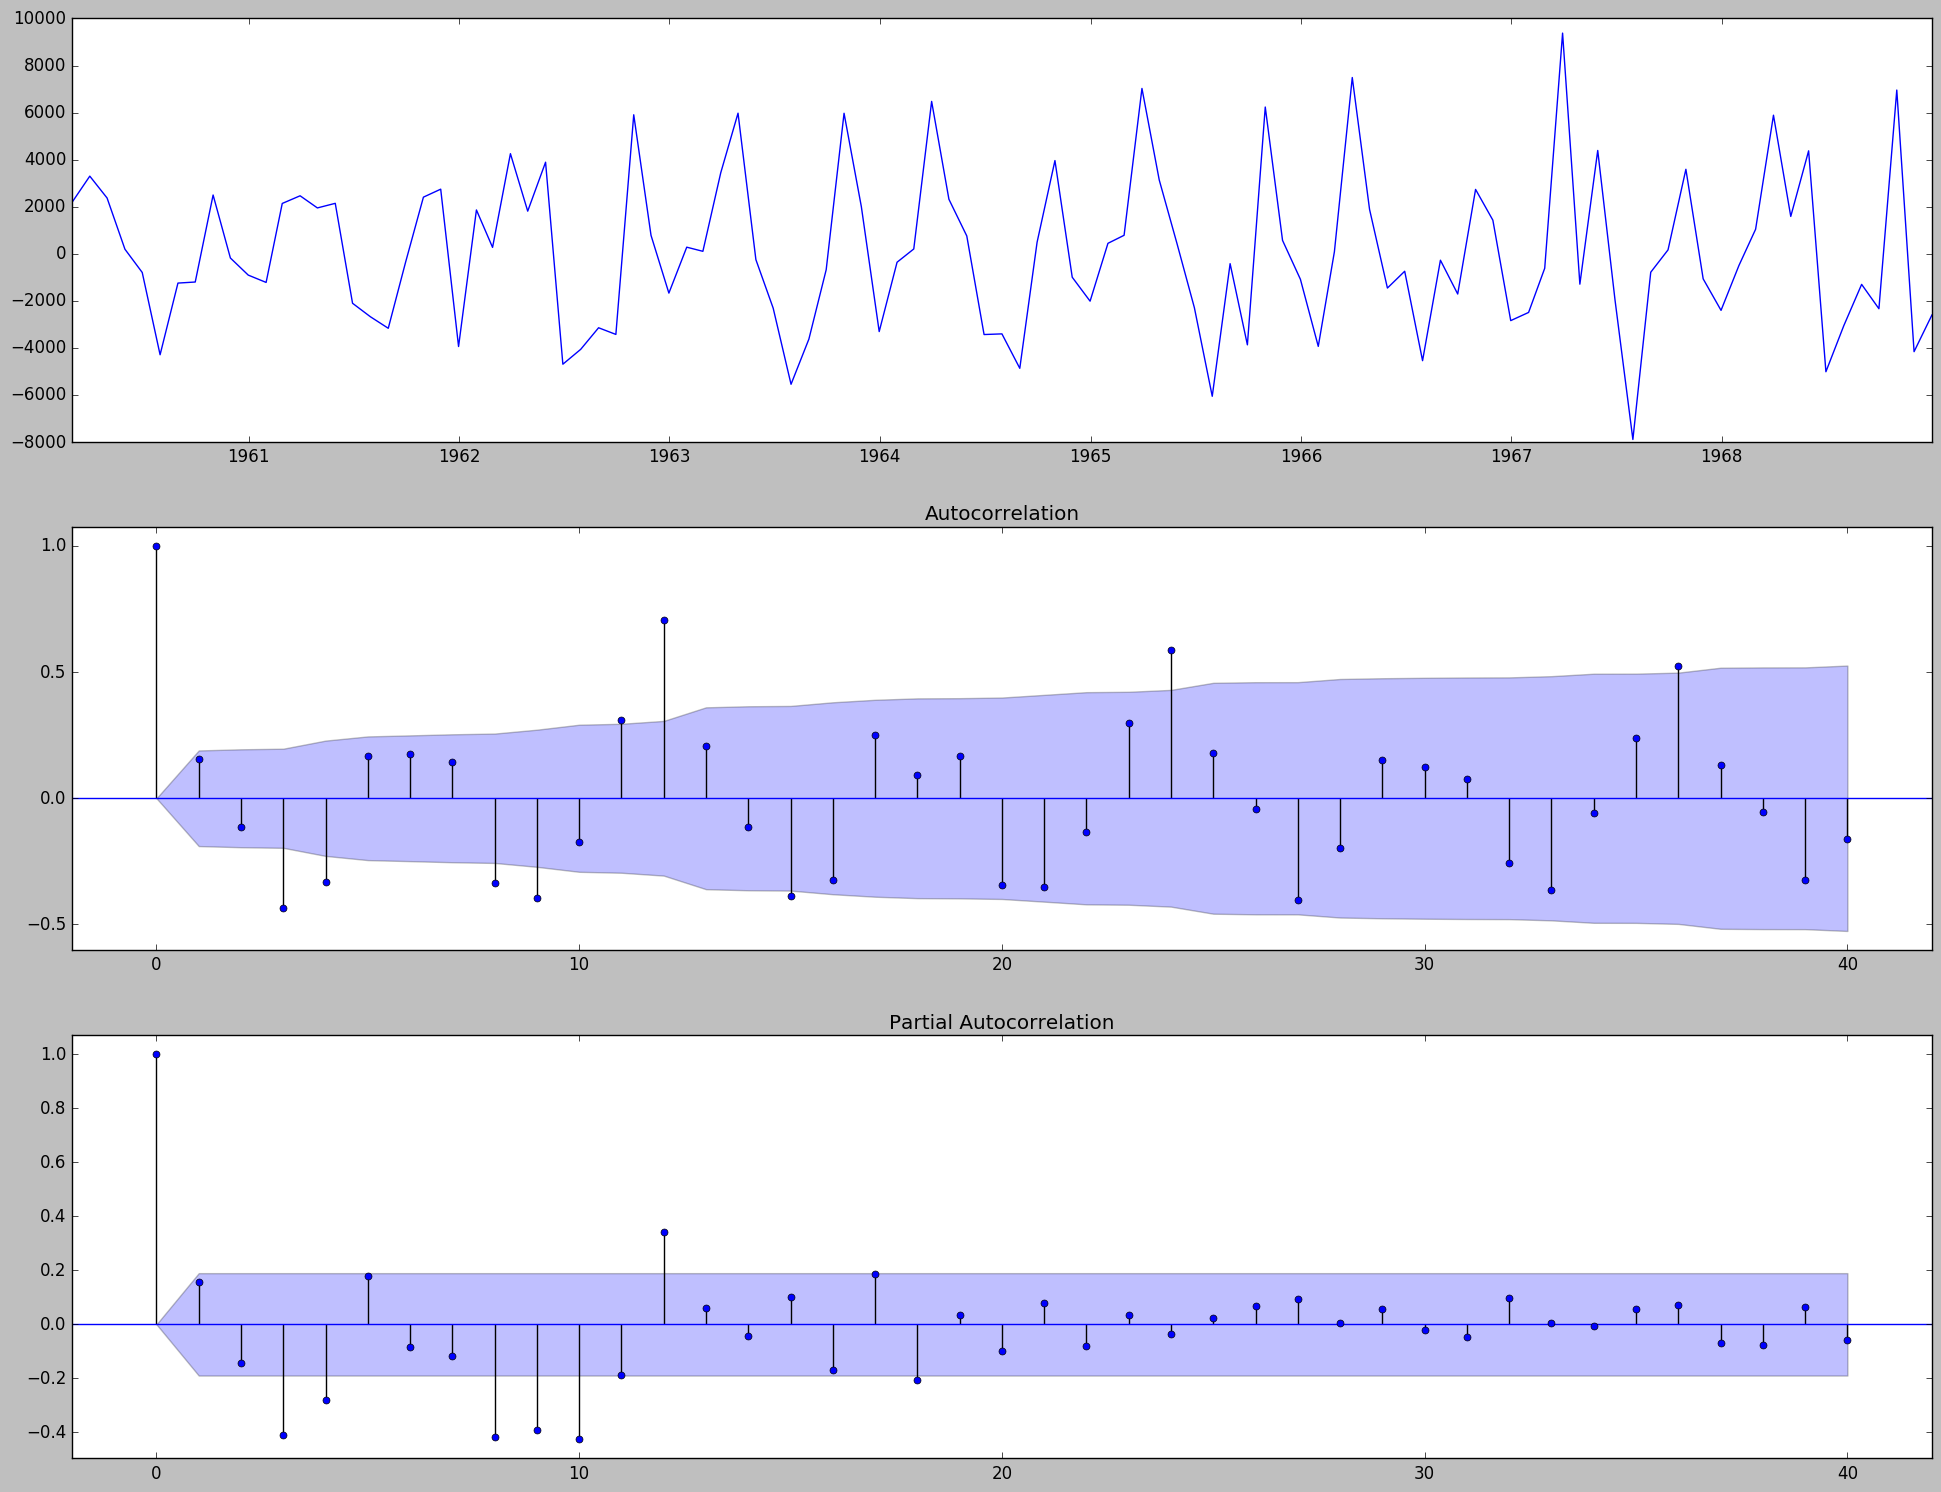

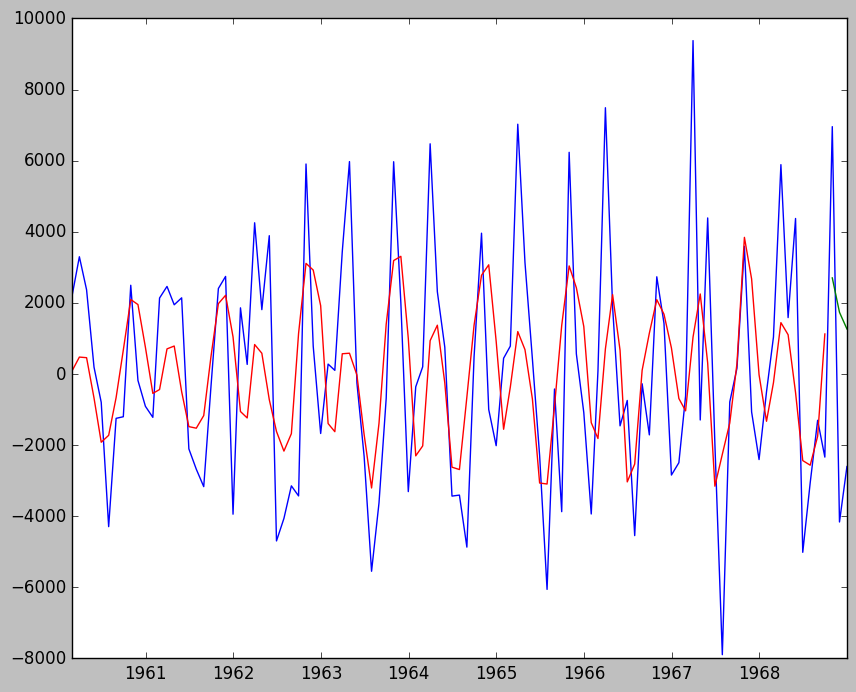

In [324]:
plt.figure(figsize=(10,8))
plt.plot(ts_car_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.show()

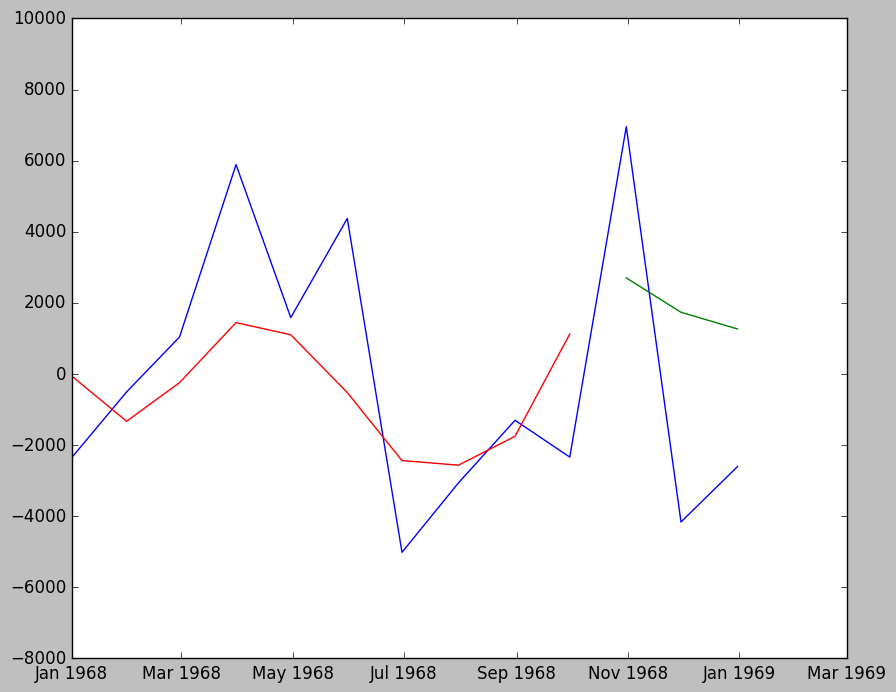

In [325]:
plt.figure(figsize=(10,8))
plt.plot(ts_car_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.xlim(datetime.datetime(1968,1,1), datetime.datetime(1969,3,1))
plt.show()

# What if we try MA(4)

In [326]:
model = ARMA(ts_car_fd_train, order=(0,4))  
results_AR = model.fit() 
forecast = pd.Series(results_AR.forecast(3)[0], index = ts_car_fd_test.index)

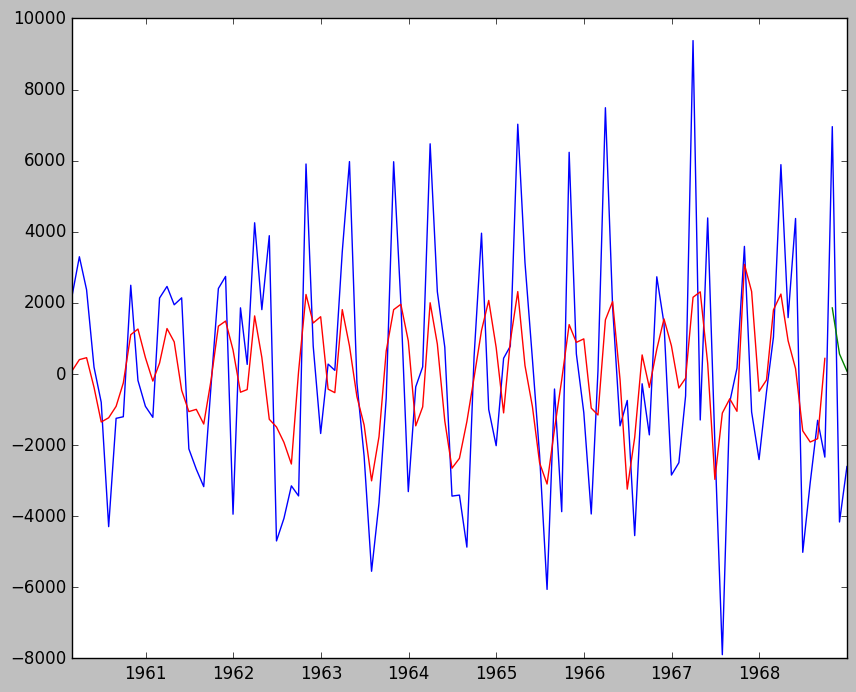

In [327]:
plt.figure(figsize=(10,8))
plt.plot(ts_car_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.show()

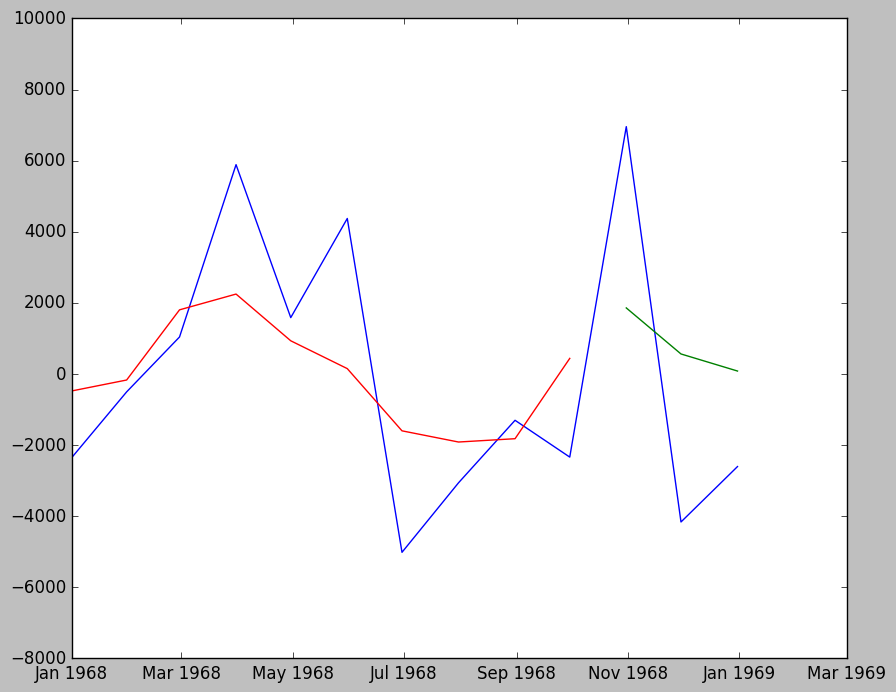

In [328]:
plt.figure(figsize=(10,8))
plt.plot(ts_car_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.xlim(datetime.datetime(1968,1,1), datetime.datetime(1969,3,1))
plt.show()

# ARMA Time

In [329]:
model = ARMA(ts_car_fd_train, order=(3,3))  
results_AR = model.fit() 
forecast = pd.Series(results_AR.forecast(3)[0], index = ts_car_fd_test.index)

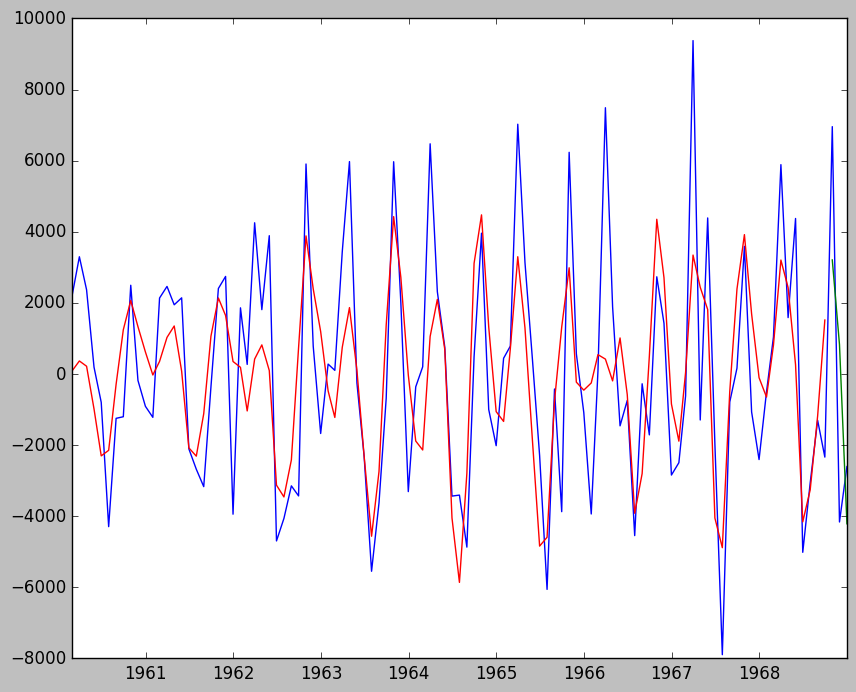

In [330]:
plt.figure(figsize=(10,8))
plt.plot(ts_car_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.show()

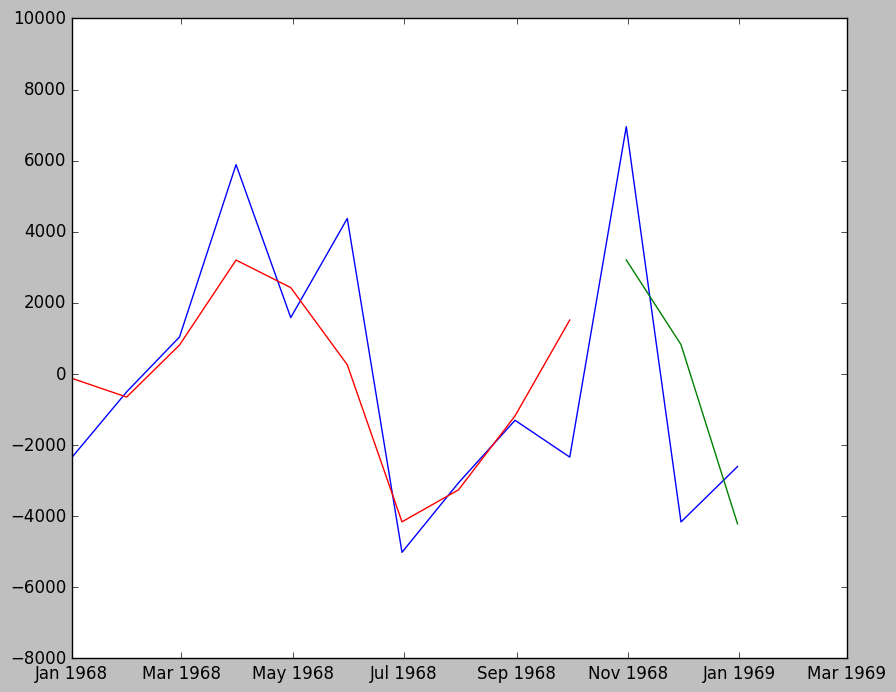

In [331]:
plt.figure(figsize=(10,8))
plt.plot(ts_car_fd)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(forecast, color = 'green')
plt.xlim(datetime.datetime(1968,1,1), datetime.datetime(1969,3,1))
plt.show()

# Is there Structure in our Residuals?

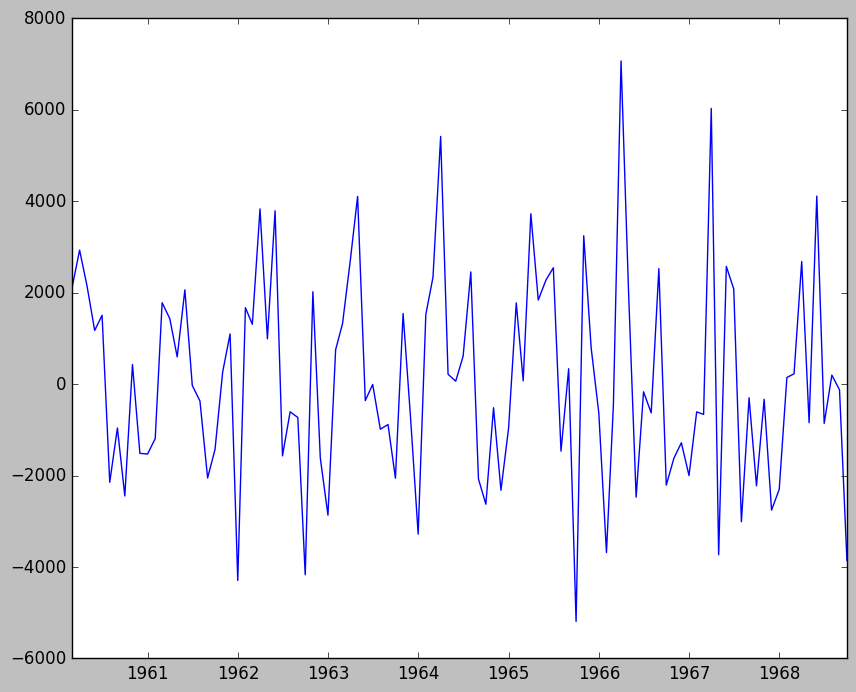

In [332]:
plt.figure(figsize=(10,8))
resid = ts_car_fd_train - results_AR.fittedvalues
plt.plot(resid)
plt.show()

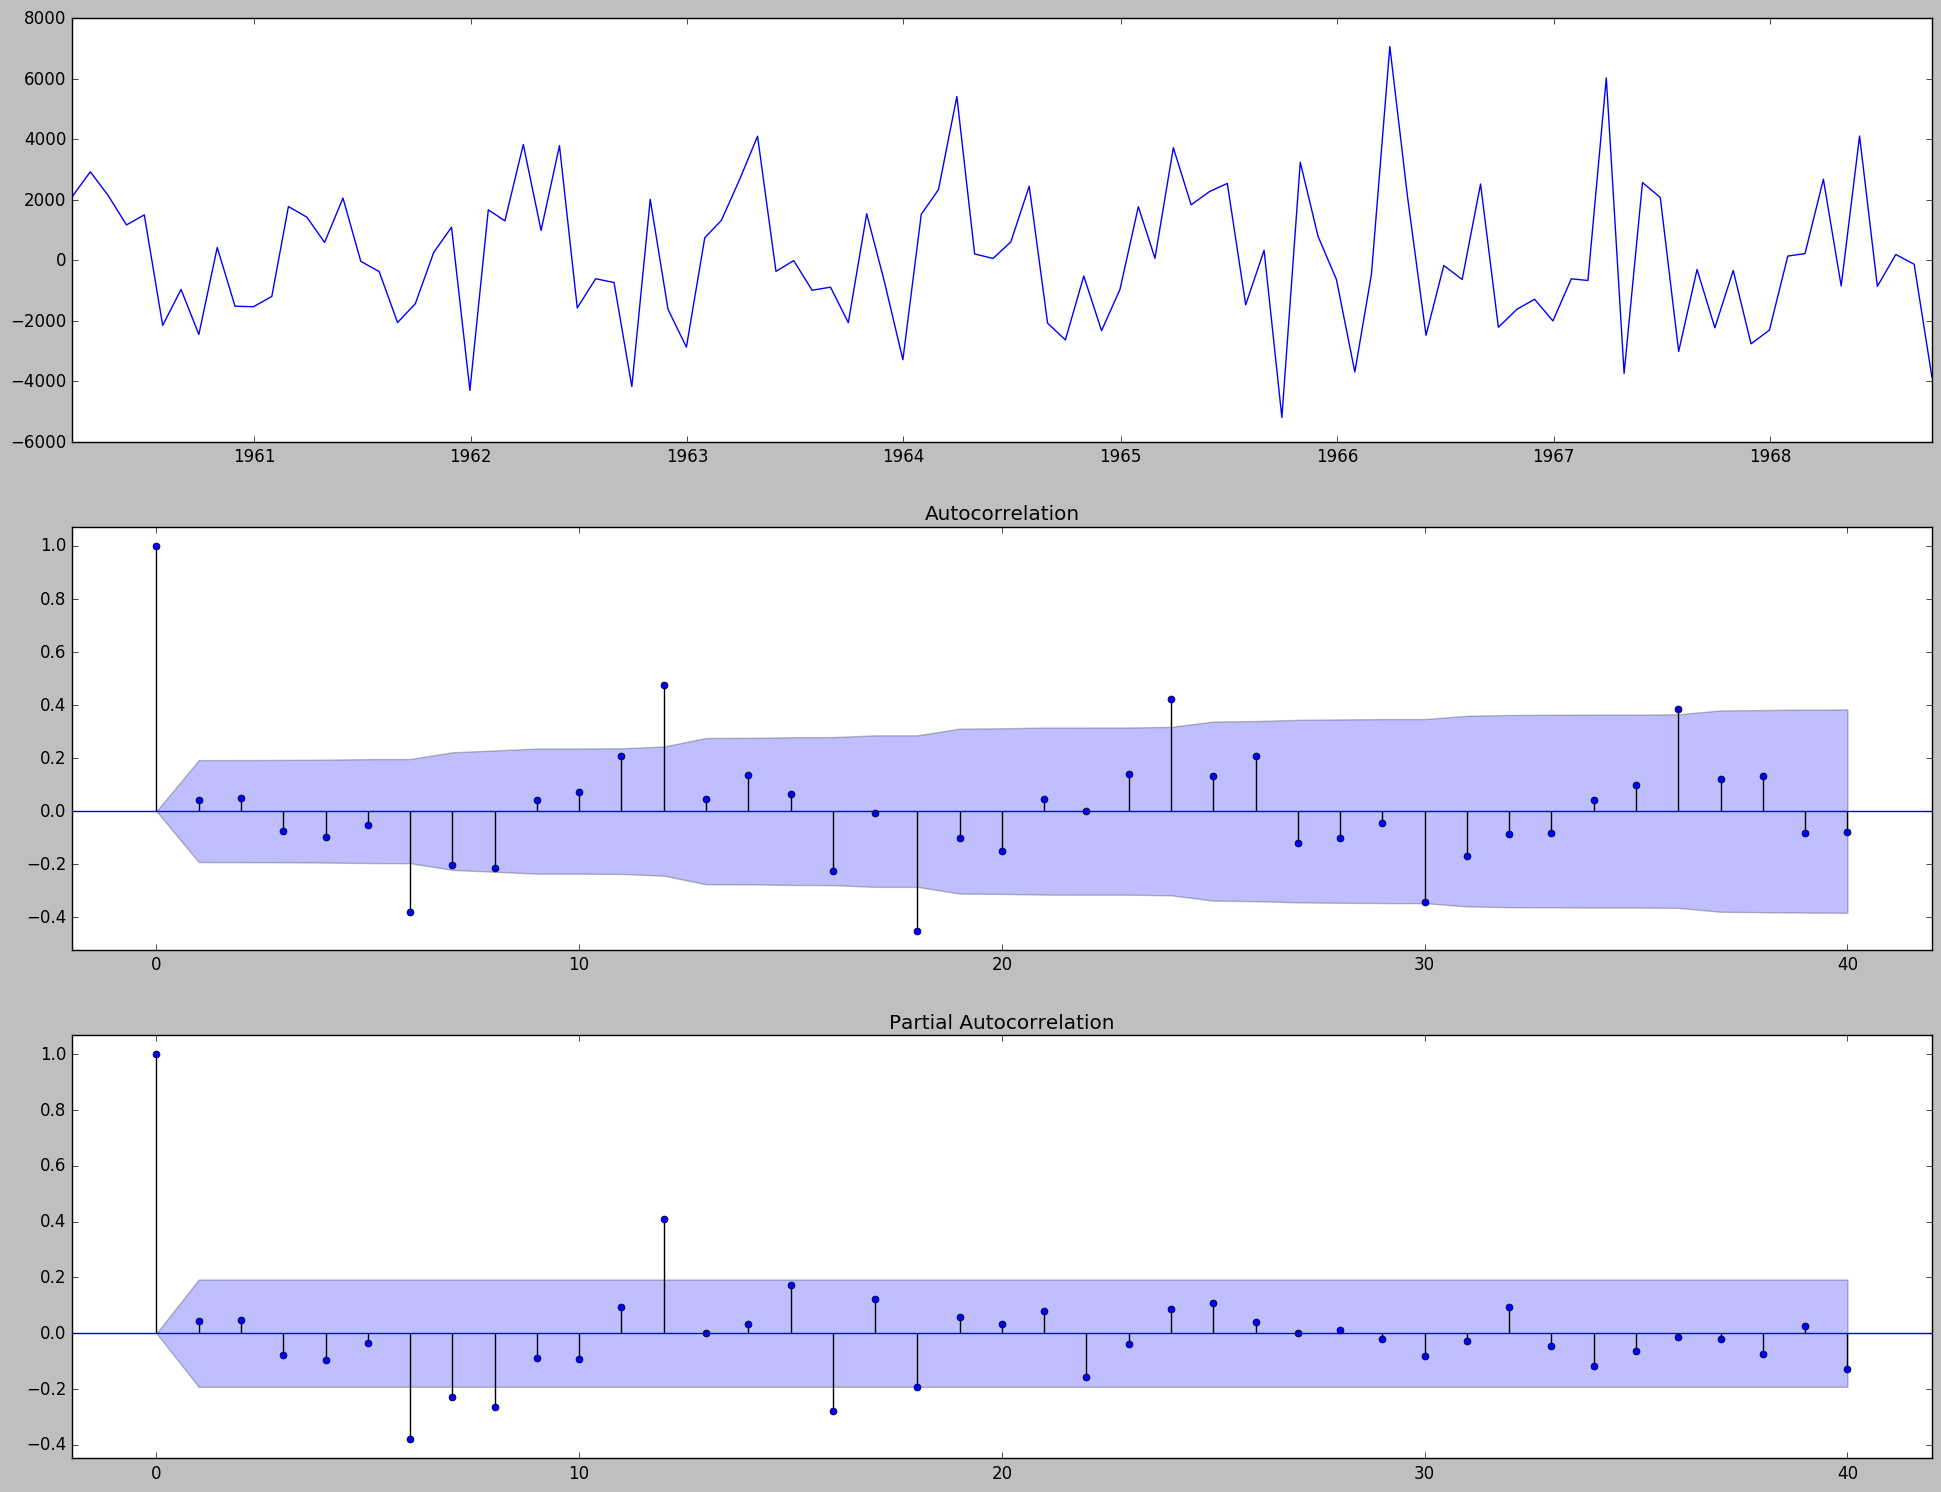

In [333]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(24,18)) 
ax1.plot(resid)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax = ax2)
sm.graphics.tsa.plot_pacf(resid.values.squeeze(), lags=40, ax = ax3)